# Light and colour

<img src ="rgbspectral.png" style = "width:500px"/>

Humans percieve differing wavelengths of light within the visible portion of the EM spectrum as shades of colour.<br><br>
It is useful to model light with the additive system, whereby the three primary colours (red, green, blue) may be combined in varying proportions to generate any other colour. This RGB model is based on the human retina, which contains three pigments (photopsins) most spectrally sensitive to each of these hues. Combining their output produces colour vision, or photopsis. 
<br><br>
The total quantity of light, independant of the colours that make it up, is referred to as luminance. It is a representation of brightness, or intensity. 

# Images

We can represent light using images. Digital images are 2D arrays comprised of fundamental units called pixels. Each pixel stores it's location within the overall image, like a grid reference, along with the light data recorded there. <br><br>
In grayscale images, this is luminance data, or the intensity of light at each point in the image. It may take values that correspond to absolute white, absolute black, or a shade of gray in between. <br><br>
Colour images contain chromatic (colour) data in addition to this. Each pixel contains an intensity value for each of the three primary colours, which in combination produce a final colour. 

# Image data

The most fundamental unit of data storage in a computer is the bit. Bits can take 2 possible values, either 0 or 1:<br>
$2^{n}$=$2^{1}$=$2$ <br>
This could encode white (0) or black (1) in a black and white image. <br><br>
If we wish to see more detail, we need to represent shades of gray in between. Grayscale images are usually 8 bit, meaning they use 8 bits to encode luminance information for every pixel. As each bit can equal either 0 or 1, there are 256 ways this can be arranged: <br>
$2^{n}$=$2^{8}$=$256$ <br>
0 for pure white, 255 for pure black, and 254 shades of gray in between.<br><br>
Colour images follow the above principle. Each pixel contains a value for the intensity of each of the three primary colours. Common formats include 8 bit colour, where each pixel is represented by 3 bits for red; 3 for green; and 2 for blue: $RRRGGGBB$ <br>
Using the above equation, this corresponds to 8 shades of red; 8 shades of green; and 4 for blue.

How exactly this information is arranged depends on the exact filetype used.

# Python: pillow

I recommend pillow when working with images in python. <br>
It imports images as image objects, using absolute or relative filepaths. <br>
Using Image.open() will open the image using your default program for viewing images.

In [1]:
from PIL import Image
import os
os.getcwd()
im = Image.open("test.png")
# You can change "test.png" to an image file in the same folder as this Jupyter notebook file
im.show()

Image objects can be extensively processed.

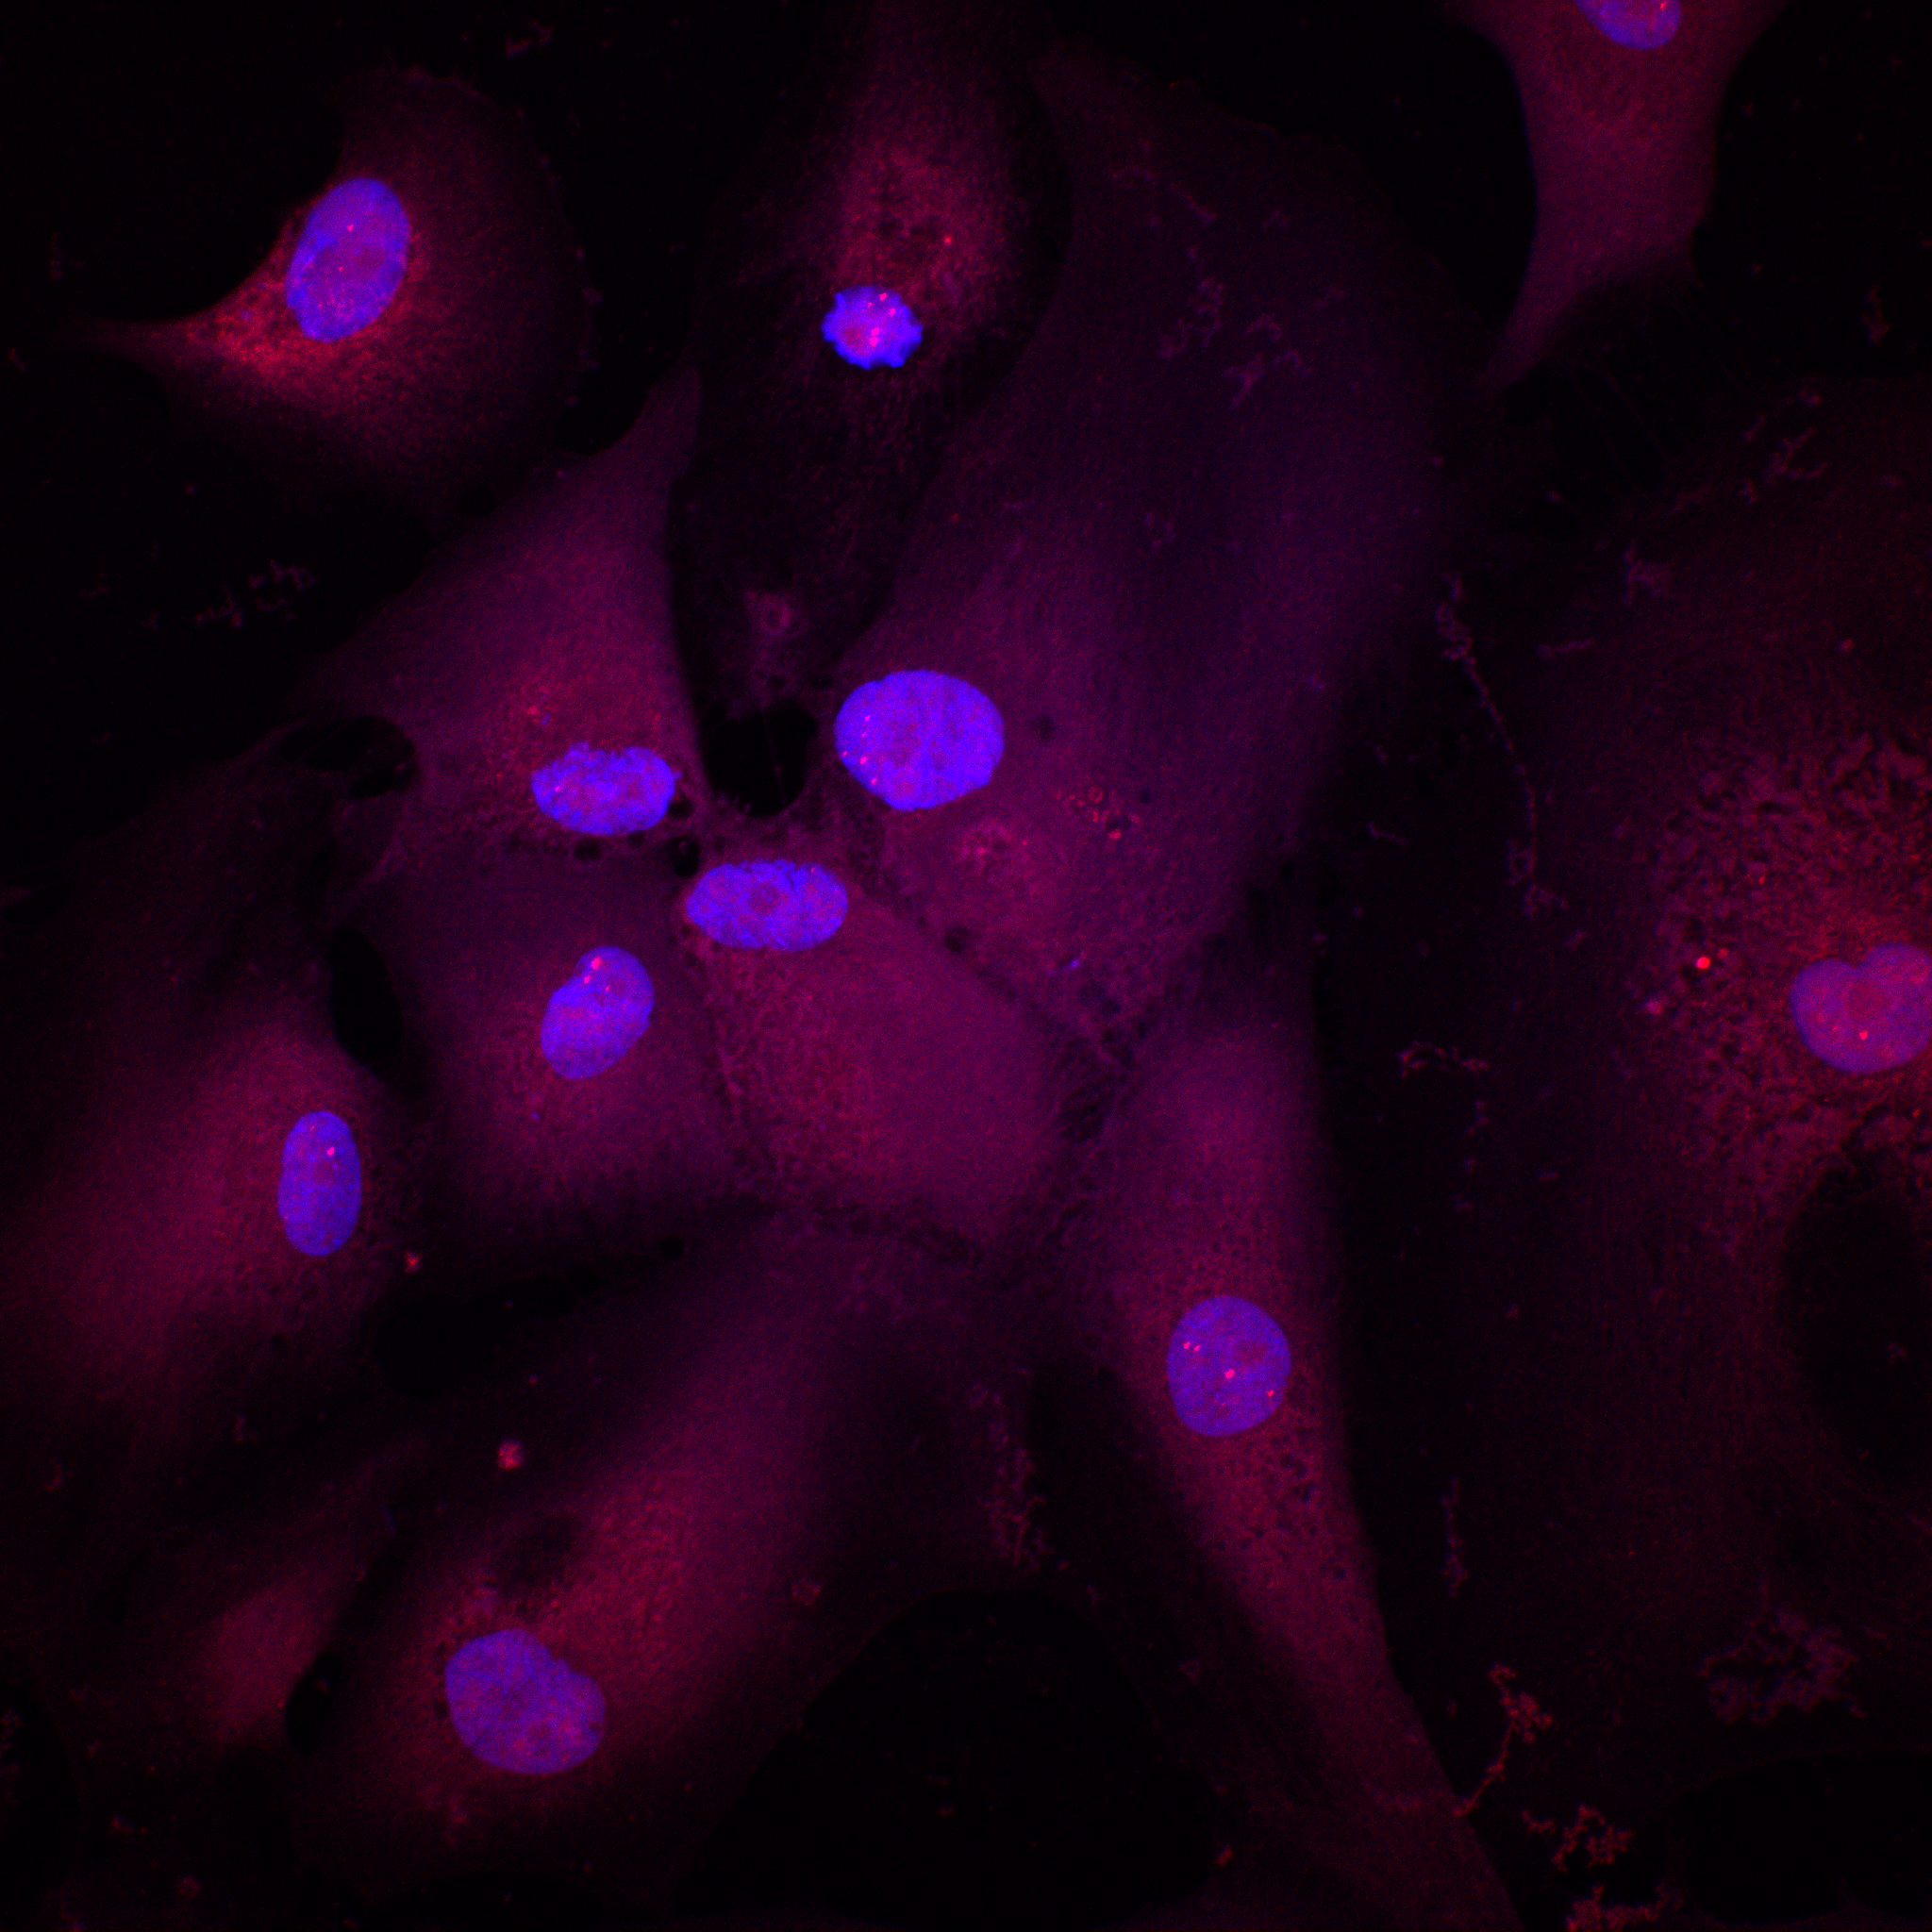

In [2]:
# To check if image is colour (RGB) or grayscale (L):
im.mode
# RGB images can be split into individual colour channels (colours):
r,g,b = im.split()
# And subsequently rejoined: 
im = Image.merge("RGB", (r,g,b))
# Useful for microscope files!

# To check the image resolution:
im.size
# For ML, we preprocess images to a standard size of 256*256
im.resize((256,256))
# We may also rotate the image, specifying degrees counter-clockwise:
im.rotate(90)

The image object can then be saved. You can specify a full absolute filepath, or just a filename to save it in the current working directory. You can also specify a filetype (.jpg, .tiff) to save it in that format.

In [3]:
#im.save("test.png")

Images can be iterated over using for loops, for batch processing:

In [4]:
import glob
from glob import glob

os.chdir("Change this to a directory of your choice containing image files")
files = glob('*.png')
for imfile in files:
    print(f"File: {imfile},  original resolution: {im.size}")
    im = Image.open(imfile)
    im = im.resize((2048, 2048))
    im.save(imfile)

File: 10_left.png,  original resolution: (2048, 2048)
File: 10_right.png,  original resolution: (2048, 2048)
File: 13_left.png,  original resolution: (2048, 2048)
File: 13_right.png,  original resolution: (2048, 2048)
File: 15_left.png,  original resolution: (2048, 2048)
File: 15_right.png,  original resolution: (2048, 2048)
File: 16_left.png,  original resolution: (2048, 2048)
File: 16_right.png,  original resolution: (2048, 2048)
File: 17_left.png,  original resolution: (2048, 2048)
File: 17_right.png,  original resolution: (2048, 2048)
File: 46_right.png,  original resolution: (2048, 2048)


Pillow image objects can be converted to numpy arrays.

In [5]:
import numpy as np
imfile = ("Change this to an image file of your choice")
im = Image.open(imfile)
imagearray = np.asarray(im)
print(imagearray.shape)
print(imagearray)

(256, 256)
[[165 161 157 ... 169 165 128]
 [163 160 158 ... 178 171 124]
 [161 159 158 ... 143 119  65]
 ...
 [ 49  49  51 ...  88  91  90]
 [ 45  49  51 ...  99  99  95]
 [ 42  49  52 ... 102 108 110]]


You can operate on these arrays as usual, including slicing. Remember to use zero indexing!

In [6]:
print(imagearray[0])

[165 161 157 157 161 163 162 159 159 159 157 156 155 155 154 154 158 162
 165 166 168 172 172 170 170 175 171 159 149 140 123 105  96  94  94  98
 102 105 108 111 107 108 109 109 108 109 110 111 112 109 107 109 110 112
 116 120 123 121 123 126 127 126 128 132 130 128 128 130 133 134 132 130
 125 128 131 131 130 130 133 136 132 135 136 134 134 135 133 131 136 133
 131 132 134 135 133 130 138 137 136 136 136 136 134 133 133 134 132 129
 129 132 133 132 128 133 136 133 130 130 132 133 132 132 136 138 136 131
 132 137 141 134 127 127 131 134 132 128 126 130 133 132 131 131 130 128
 129 128 128 127 127 129 130 131 123 123 122 120 116 111 106 102 114 122
 132 141 145 150 155 158 156 160 161 155 150 150 154 156 157 155 155 156
 157 158 156 154 150 154 155 153 152 155 155 153 157 157 157 157 158 158
 156 155 152 182 199 203 213 217 215 219 218 205 168 124 102 107 113 111
 119 113 120 124 118 120 125 118 125 124 123 121 119 119 121 122 121 123
 124 125 128 128 124 117 119 126 130 129 125 124 12

Pre-processing images manually for ML models can be a very involved process. Luckily, many libraries can automate this for us. For instance, keras has ImageDataGenerator, which can accept either a specified directory with subfolders for each category of images, or arrays for images (x) and categories (y).

It can also perform real-time augmentation, including modifications to flipping; rotation; brightness; and zoom. 

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

# Sources

- Lee, H. (2005). Introduction to Color Imaging Science. Cambridge: Cambridge University Press. doi:10.1017/CBO9780511614392
- Brown, B. (2012). Cinematography: Theory and practice : imagemaking for cinematographers and directors. Amsterdam: Elsevier/Focal Press
- Chollet F. Keras [Internet]. 2015. Available from: https://keras.io/
- https://pillow.readthedocs.io/en/stable/reference/Image.html